In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [3]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [4]:
y_test = y_test.reshape(-1,)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [5]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

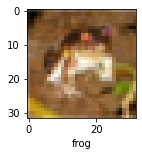

In [6]:
plot_sample(X_train, y_train, 0)

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 8s 3ms/step - loss: 1.8114 - accuracy: 0.3553
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6231 - accuracy: 0.4287
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5419 - accuracy: 0.4565
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4842 - accuracy: 0.4748
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4362 - accuracy: 0.4934
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3924 - accuracy: 0.5112
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3537 - accuracy: 0.5241
Epoch 8/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3189 - accuracy: 0.5362
Epoch 9/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2861 - accuracy: 0.5488
Epoch 10/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.255

In [9]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 15s 3ms/step - loss: 1.4481 - accuracy: 0.4805
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0955 - accuracy: 0.6169
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9652 - accuracy: 0.6660
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8814 - accuracy: 0.6944
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8135 - accuracy: 0.7178
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7583 - accuracy: 0.7359
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7102 - accuracy: 0.7512
Epoch 8/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6636 - accuracy: 0.7683
Epoch 9/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6272 - accuracy: 0.7813
Epoch 10/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.59

In [ ]:
from tensorflow.python.client import device_lib
tf.config.list_physical_devices('GPU')

[]

In [ ]:
tf.test.is_built_with_cuda()

True